In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\jaanv\Desktop\AirPassengers\AirPassengers.csv")
data.head()
# - represents number of passenger in the passenger column

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
data["Month"]

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [7]:
data['Month'] = pd.to_datetime(data['Month'])
data['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [8]:
data['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 144 entries, 0 to 143
Series name: Month
Non-Null Count  Dtype         
--------------  -----         
144 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 KB


In [9]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
data.index

RangeIndex(start=0, stop=144, step=1)

In [11]:
data.index = data['Month']
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [12]:
del data['Month']
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [14]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


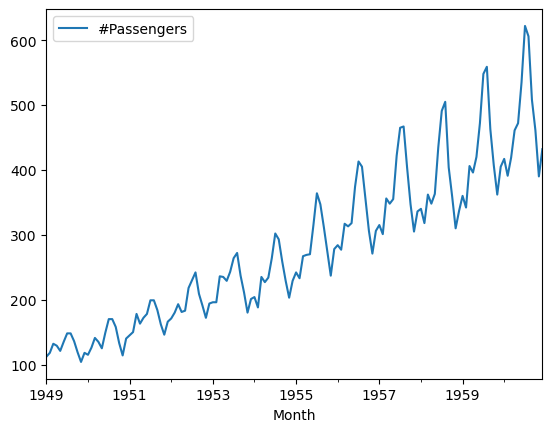

In [15]:
data.plot()
plt.show()

In [17]:
'''Upward Trend can be seen, also can be called as cyclical data - changes that occur over the same time 
'''

'Upward Trend can be seen, also can be called as cyclical data - changes that occur over the same time \n'

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
result = adfuller(data['#Passengers'])
print(result)

(0.8153688792060543, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [20]:
# 13, 130 = 13 lags 130 observation of lags
print('p-value: %f' %result[1])
if result[1]>0.5:
    print('not stationary')
else:
    print('stationary')

p-value: 0.991880
not stationary


In [ ]:
#afuller = p<0.05--> stationary
# kpss = p>0.05 --> stationary
# you can use any one to test stationarity of the data

In [21]:
from statsmodels.tsa.stattools import kpss
stats, p, lags, critical_values = kpss(data['#Passengers'])
if p>0.05:
    print('stationary')
else:
    print('not stationary')
print(p)

not stationary
0.01


C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
# removing trend using the rolling mean/ moving average differencing
# rolling mean or moving mean is the mean of a particular var at different time intervals
# window = means the months, years, etc - months because monthly data
# rolling avg are useful for finding long term trends disguised by occasional fluctuations

In [22]:
rolling_mean = data.rolling(window = 12).mean()
rolling_mean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [23]:
rolling_mean_detrended = data - rolling_mean
rolling_mean_detrended

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


<AxesSubplot:title={'center':'Original Values'}, xlabel='Month'>

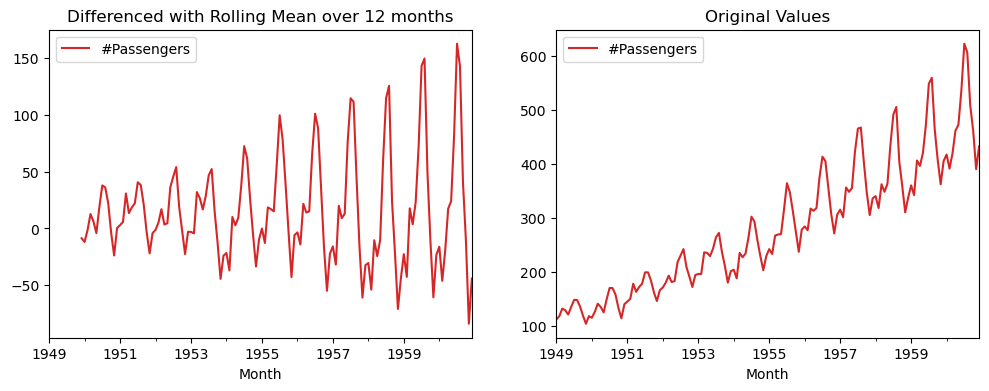

In [26]:
ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4), color = "tab:red",
                           title = 'Differenced with Rolling Mean over 12 months',
                           ax = ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), color = 'tab:red', 
          title = "Original Values", ax = ax2)

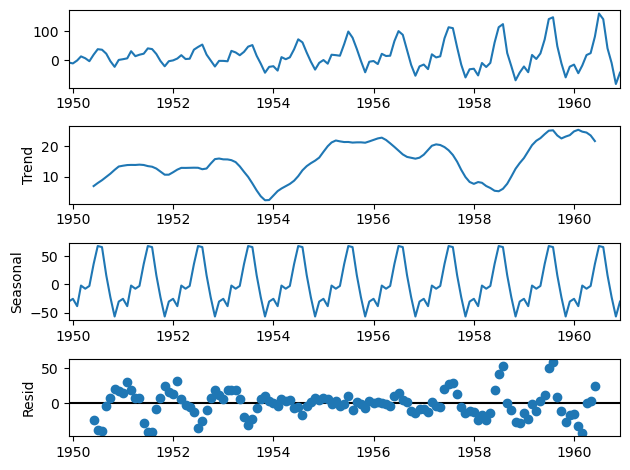

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())

decompose_result.plot();

In [31]:
rolling_mean_detrended.head(24) # first 11 would be null because we do not have any previous data to do differencing with

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
# shift func  - shifts the data 

In [36]:
rolling_mean_detrended_diff  = rolling_mean_detrended - rolling_mean_detrended.shift()
rolling_mean_detrended_diff.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


<AxesSubplot:title={'center':'Differenced with Rolling Mean over 12 months'}, xlabel='Month'>

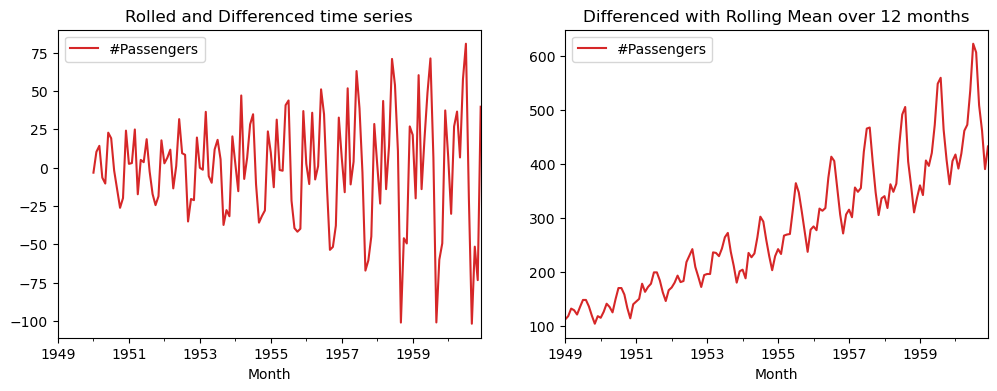

In [38]:
ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4), color = "tab:red",
                           title = 'Rolled and Differenced time series',
                           ax = ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), color = 'tab:red', 
          title = "Differenced with Rolling Mean over 12 months", ax = ax2)

In [39]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()
rolling_mean_detrended_diff

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


<AxesSubplot:title={'center':'Original Values'}, xlabel='Month'>

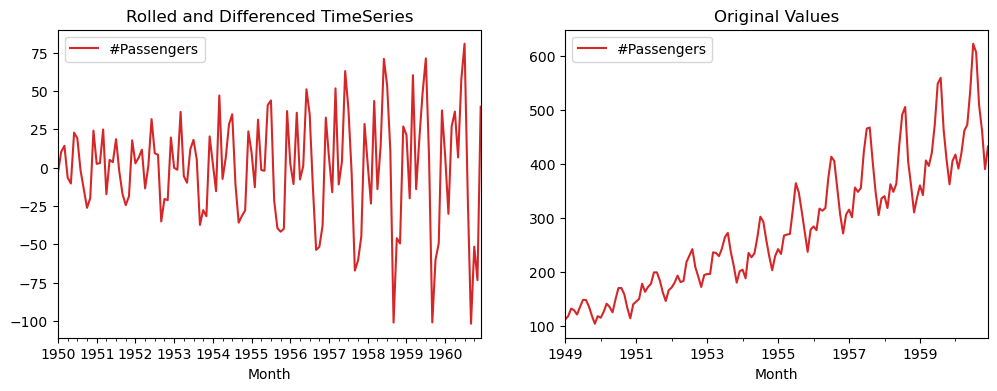

In [40]:
ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                color = "tab:red",
                                title = "Rolled and Differenced TimeSeries",
                                ax = ax1)
ax2 = plt.subplot(122)
data.plot(figsize = (12,4),
         color = "tab:red",
         title = "Original Values",
         ax = ax2)

In [43]:
result = adfuller(rolling_mean_detrended_diff['#Passengers'])
print('ADF statistic: %f' % result[0])
print('p-value: %f'% result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistic: -3.154483
p-value: 0.022775
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


In [48]:
dftest = adfuller(rolling_mean_detrended_diff['#Passengers'], autolag = "AIC")
print('1. ADF: ', dftest[0])
print('2. P-value: ', dftest[1])
print('3. Num of lags:',dftest[2] )
print('4. Num of observations Used for ADF Regression and Critical Values Calculation: ', dftest[3])
print('5. Critical Values:')
for key, values in dftest[4].items():
    print("\t", key, ": ", values)

1. ADF:  -3.154482634863571
2. P-value:  0.022775264967859542
3. Num of lags: 12
4. Num of observations Used for ADF Regression and Critical Values Calculation:  119
5. Critical Values:
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


In [49]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

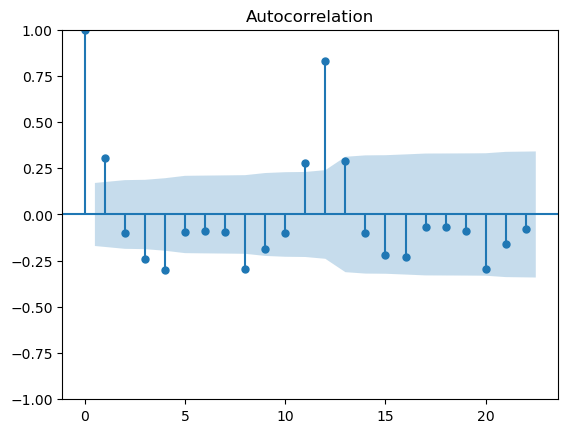

In [50]:
plot_acf(rolling_mean_detrended_diff['#Passengers']);

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


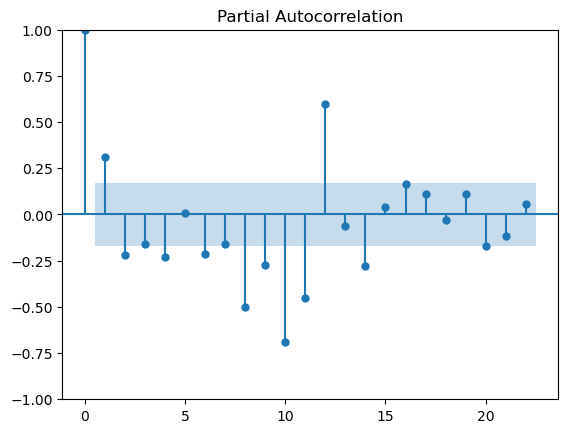

In [55]:
plot_pacf(rolling_mean_detrended_diff['#Passengers']);

In [53]:
#either we go ahead with acf or pacf or we directly use auto arima
!pip install pmdarima

     -------------------------------------- 572.7/572.7 kB 1.9 MB/s eta 0:00:00


In [54]:
from pmdarima import auto_arima

In [56]:
order = auto_arima(rolling_mean_detrended_diff['#Passengers'], trace = True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Sat, 07 Oct 2023   AIC                           1235.785
Time:                        20:46:12   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.347      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5267      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9137      0.128     -7.155      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.885      0.000      -1.150      -0.492
ma.L3          0.7469      0.095      7.852      0.000       0.560       0.933
sigma2       586.1983     67.806      8.645      0.000     453.301     719.095
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
!pip install statsmodels

In [65]:
from statsmodels.tsa.arima.model import ARIMA

train = rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test = rolling_mean_detrended_diff.iloc[121]['#Passengers']
model = ARIMA(train, order=(3, 0, 3))
model_fit = model.fit()
model_fit.summary()


C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -546.713
Date:                Sat, 07 Oct 2023   AIC                           1109.427
Time:                        21:01:05   BIC                           1131.727
Sample:                    01-01-1950   HQIC                          1118.483
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.040      1.630      0.103      -0.013       0.143
ar.L1          0.7919      0.116      6.837      0.000       0.565       1.019
ar.L2          0.3300      0.133      2.482      0.013       0.069       0.591
ar.L3         -0.5813      0.077     -7.571      0.000      -0.732      -0.431
ma.L1         -0.8686      2.459     -0.353      0.724      -5.688       3.951
ma.L2         -0.9992      2.252     -0.444      0.657      -5.414       3.415
ma.L3          0.8680      2.621      0.331      0.740      -4.268       6.004
sigma2       484.3201   1532.004      0.316      0.752   -2518.352    3486.992
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.97   Prob(JB):                         0.92
Heteroskedasticity (H):               5.91   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

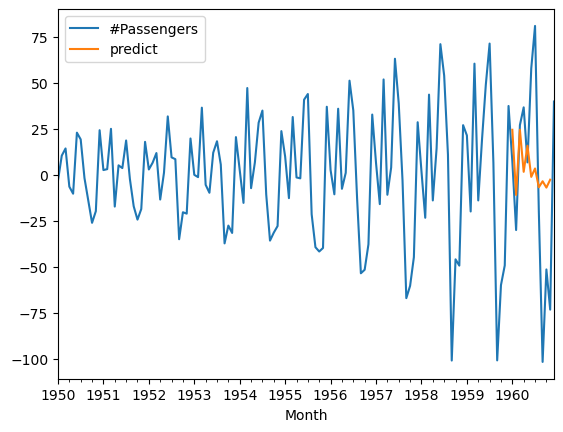

In [68]:
# Correctly select the test data as a series
test = rolling_mean_detrended_diff.iloc[121:]['#Passengers']
rolling_mean_detrended_diff['predict'] = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=True)
rolling_mean_detrended_diff[['#Passengers', 'predict']].plot()


In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [72]:
model = SARIMAX(train, order = (1,0,2), seasonal_order= (1,0,2,12),
                enforce_stationarity = False)
model = model.fit()

C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jaanv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

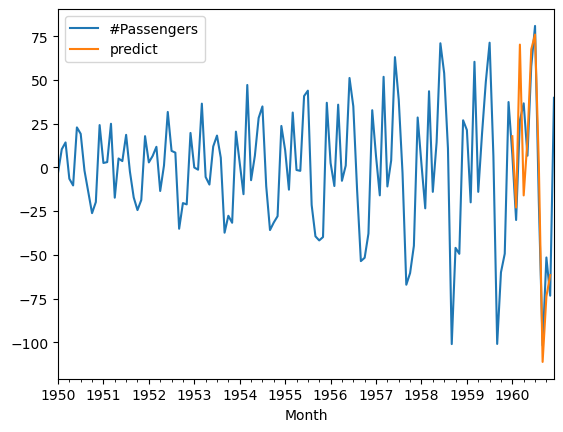

In [74]:
rolling_mean_detrended_diff['predict'] = model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=True)
rolling_mean_detrended_diff[['#Passengers', 'predict']].plot()

<AxesSubplot:xlabel='Month'>

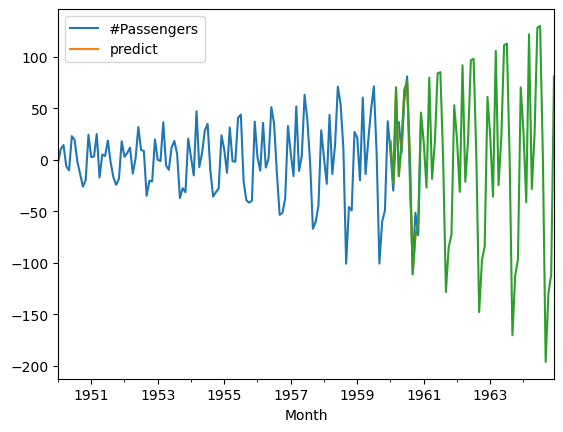

In [75]:
 # predicting the projections for 5 years (12*5 =60)
forecast = model.forecast(steps = 60)
rolling_mean_detrended_diff.plot()
forecast.plot()

In [76]:
type(forecast) # S - timeseries data , s - pandas series

pandas.core.series.Series